In [1]:
#test avec prophet

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

/Users/sylvainjiang/anaconda3/lib/python3.7/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [2]:
uber = pd.read_csv('../uber_data.csv', parse_dates = ['pickup_dt'])

In [3]:
man = uber[uber['borough'] == 'Manhattan']

In [4]:
man = man[man['pickup_dt'] < '2015-03-01 00:00:00']

In [5]:
man = man[['pickup_dt', 'pickups']]

In [6]:
man.columns = ['ds', 'y']

In [7]:
man.tail()

,ds,y
9357,2015-02-28 19:00:00,4929
9364,2015-02-28 20:00:00,5234
9371,2015-02-28 21:00:00,4614
9378,2015-02-28 22:00:00,4760
9385,2015-02-28 23:00:00,5359


In [8]:
model = Prophet()
model.fit(man)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [9]:
future = model.make_future_dataframe(periods = 5)
future.tail()

,ds
1415,2015-03-01 23:00:00
1416,2015-03-02 23:00:00
1417,2015-03-03 23:00:00
1418,2015-03-04 23:00:00
1419,2015-03-05 23:00:00


In [10]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1415,2015-03-01 23:00:00,2830.020949,1783.650150,3833.164552
1416,2015-03-02 23:00:00,2870.808215,1912.095337,3963.632264
1417,2015-03-03 23:00:00,3076.011813,2027.868716,4114.521179
1418,2015-03-04 23:00:00,3346.277274,2314.322605,4358.467846
1419,2015-03-05 23:00:00,3541.036858,2482.213394,4528.668577


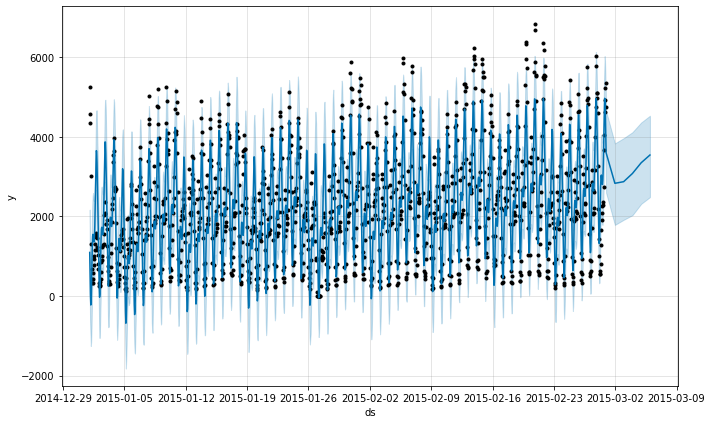

In [11]:
fig = model.plot(forecast)

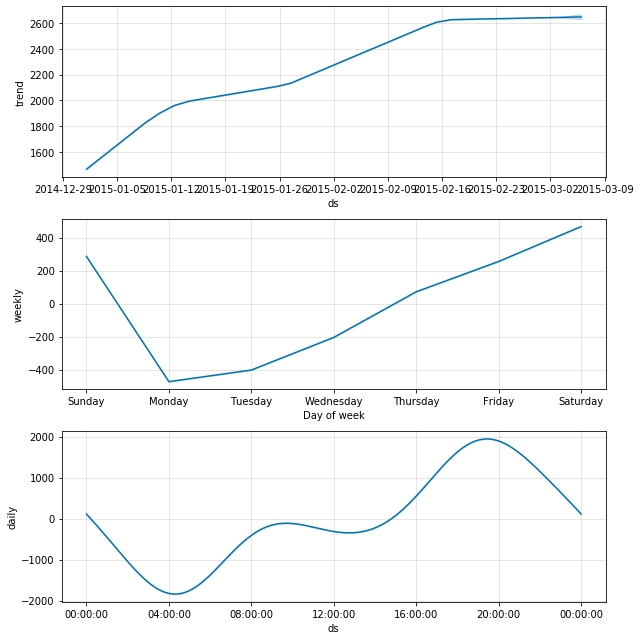

In [12]:
fig = model.plot_components(forecast)